In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

veriler=pd.read_csv("Ads_CTR_Optimisation.csv")
veriler

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


netflix reklamları

# Random Selection

(array([ 951., 1060., 1062.,  963.,  980., 1007.,  982.,  965., 1049.,
         981.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

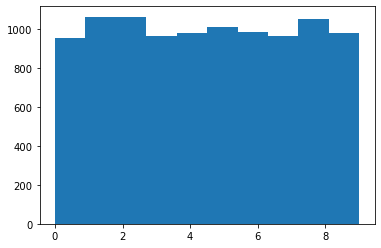

In [28]:
import random
toplam=0
N=10000
d=10
secilenler=[]


for n in range(0,N):
    ad=random.randrange(d)
    secilenler.append(ad)
    odul=veriler.values[n,ad]
    toplam=toplam+odul
plt.hist(secilenler)

In [29]:
toplam

1254

# UCB

In [30]:
import math
toplam=0 #toplam odeul
N=10000 #10k tıklama
d=10 #toplam 10 ilan var
oduller=[0]*d #ilk basta butun ilanlar odeulu 0 
tiklamalar=[0]*d
secilenler=[0]

for n in range(1,N):
    ad=0 #secilen ilan
    max_ucb=0
    for i in range(0,d):
        if(tiklamalar[i]>0):
            ortalama=oduller[i]/tiklamalar[i]
            delta=math.sqrt(3/2*math.log(n)/tiklamalar[i])
            ucb=ortalama+delta
        else:
            ucb=N*10
        if max_ucb<ucb: #maxtan buyuk bir ucb cıkarsa
            max_ucb=ucb
            ad=i
            
    secilenler.append(ad)
    tiklamalar[ad]=tiklamalar[ad]+1
    odul=veriler.values[n,ad]
    oduller[ad]=oduller[ad]+odul
    toplam=toplam+odul
toplam

2231

(array([ 530.,  372.,  253.,  394., 6187.,  144.,  283., 1320.,  321.,
         196.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

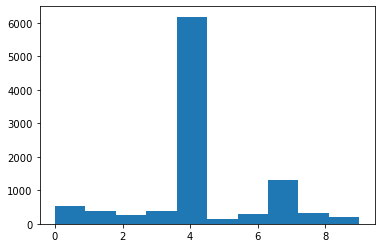

In [31]:
plt.hist(secilenler)

In [33]:
#ucb randomdan çok iyi-eğitimli halidir.

# Thompson

In [34]:
import math
toplam=0 #toplam odeul
N=10000 #10k tıklama
d=10 #toplam 10 ilan var
secilenler=[]
birler=[0]*d
sifirlar=[0]*d

for n in range(1,N):
    ad=0 #secilen ilan
    max_th=0
    for i in range(0,d):
        rastgeleBeta=random.betavariate(birler[i]+1,sifirlar[i]+1)
        if(rastgeleBeta>max_th):
            max_th=rastgeleBeta
            ad=i
            
    secilenler.append(ad)
    odul=veriler.values[n,ad]
    if odul==1:
        birler[ad]=birler[ad]+1
    else:
        sifirlar[ad]=sifirlar[ad]+1
    oduller[ad]=oduller[ad]+odul
    toplam=toplam+odul
toplam

2623

(array([ 150.,   43.,   32.,  130., 9491.,   26.,   37.,   23.,   40.,
          27.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

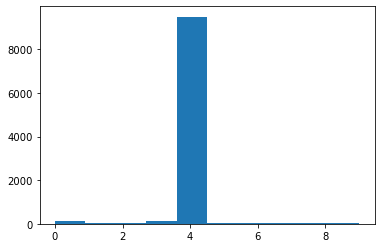

In [35]:
plt.hist(secilenler)

In [ ]:
#bu ornekte thompsan>ucb>random